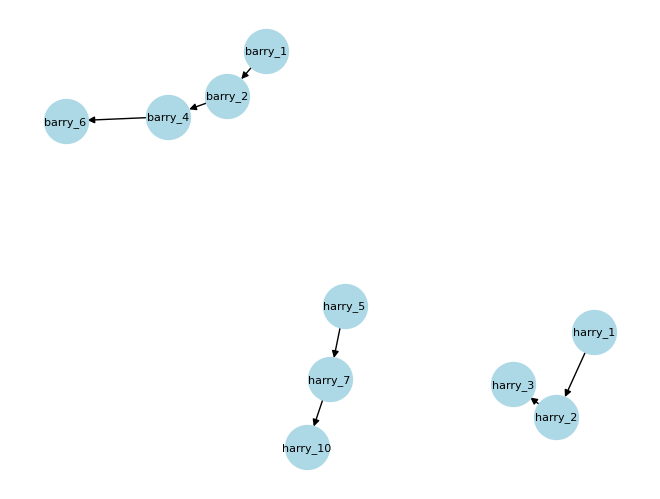

In [53]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

data = {
    'Name': ['harry', 'barry', 'barry', 'harry', 'harry', 'harry', 'barry'],
    'Start': [1, 1, 4, 2, 5, 7, 2],
    'End': [2, 2, 6, 3, 7, 10, 4]
}

df = pd.DataFrame(data)

df['start_name']= df['Name']+'_'+df['Start'].astype(str)
df['end_name']= df['Name']+'_'+df['End'].astype(str)

G = nx.DiGraph()

for _, row in df.iterrows():
    G.add_edge(row['start_name'], row['end_name'], name=row['Name'])


# Draw the network graph
pos = nx.spring_layout(G)  # Positions of nodes
nx.draw(G, pos, with_labels=True, node_size=1000, font_size=8, node_color='lightblue')

# Display the plot
plt.show()

In [1]:
def get_id(name, start, end, previous_end, previous_id) -> int:
    return previous_id if start == previous_end else previous_id + 1

id = 0
start = None
previous_end = None

for row in rows:
    name, start, end = row["name"], row["start"], row["end"] 
    id = get_id(name, start, end, previous_end, id)
    previous_end = end
    row["id"] = id

NameError: name 'rows' is not defined

In [73]:
# Iterate through the edges and print edge information
for start_node, end_node, edge_data in G.edges(data=True):
    print(f"Start Node: {start_node}, End Node: {end_node}, Name: {edge_data['name']}")


Start Node: harry_1, End Node: harry_2, Name: harry
Start Node: harry_2, End Node: harry_3, Name: harry
Start Node: barry_1, End Node: barry_2, Name: barry
Start Node: barry_2, End Node: barry_4, Name: barry
Start Node: barry_4, End Node: barry_6, Name: barry
Start Node: harry_5, End Node: harry_7, Name: harry
Start Node: harry_7, End Node: harry_10, Name: harry


In [74]:
# Print connected nodes for each edge
for start_node, end_node, edge_data in G.edges(data=True):
    neighbors_start = list(G.neighbors(start_node))
    neighbors_end = list(G.neighbors(end_node))
    print(f"Start Node: {start_node}, Connected Nodes: {neighbors_start}")
    print(f"End Node: {end_node}, Connected Nodes: {neighbors_end}")
    print()

Start Node: harry_1, Connected Nodes: ['harry_2']
End Node: harry_2, Connected Nodes: ['harry_3']

Start Node: harry_2, Connected Nodes: ['harry_3']
End Node: harry_3, Connected Nodes: []

Start Node: barry_1, Connected Nodes: ['barry_2']
End Node: barry_2, Connected Nodes: ['barry_4']

Start Node: barry_2, Connected Nodes: ['barry_4']
End Node: barry_4, Connected Nodes: ['barry_6']

Start Node: barry_4, Connected Nodes: ['barry_6']
End Node: barry_6, Connected Nodes: []

Start Node: harry_5, Connected Nodes: ['harry_7']
End Node: harry_7, Connected Nodes: ['harry_10']

Start Node: harry_7, Connected Nodes: ['harry_10']
End Node: harry_10, Connected Nodes: []



In [75]:
# Group the different paths (connected components)
paths = list(nx.connected_components(G.to_undirected()))

# Print nodes in each path
for i, path_nodes in enumerate(paths):
    print(f"Path {i + 1}: Nodes: {path_nodes}")


Path 1: Nodes: {'harry_1', 'harry_3', 'harry_2'}
Path 2: Nodes: {'barry_6', 'barry_1', 'barry_2', 'barry_4'}
Path 3: Nodes: {'harry_5', 'harry_10', 'harry_7'}


In [77]:
import pandas as pd

# Path data
path_data = [
    {'Path': 'Path 1', 'Nodes': {'harry_1', 'harry_3', 'harry_2'}},
    {'Path': 'Path 2', 'Nodes': {'barry_6', 'barry_1', 'barry_2', 'barry_4'}},
    {'Path': 'Path 3', 'Nodes': {'harry_5', 'harry_10', 'harry_7'}}
]

# Transform path data into DataFrame
df = pd.DataFrame(path_data)

# Create a new DataFrame to store node-path pairs
node_path_df = pd.DataFrame(columns=['Node', 'Path'])

# Iterate through each row in the path DataFrame
for _, row in df.iterrows():
    path_name = row['Path']
    nodes = row['Nodes']
    for node in nodes:
        node_path_df.loc[len(node_path_df)] = [node, path_name]

# Display the resulting DataFrame
print(node_path_df)


       Node    Path
0   harry_1  Path 1
1   harry_3  Path 1
2   harry_2  Path 1
3   barry_1  Path 2
4   barry_4  Path 2
5   barry_2  Path 2
6   barry_6  Path 2
7   harry_5  Path 3
8  harry_10  Path 3
9   harry_7  Path 3


In [72]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

data = {
    'Name': ['harry', 'barry', 'barry', 'harry', 'harry', 'harry', 'barry'],
    'Start': [1, 1, 4, 2, 5, 7, 2],
    'End': [2, 2, 6, 3, 7, 10, 4]
}

df = pd.DataFrame(data)

df['start_name'] = df['Name'] + '_' + df['Start'].astype(str)
df['end_name'] = df['Name'] + '_' + df['End'].astype(str)

G = nx.DiGraph()

for _, row in df.iterrows():
    G.add_edge(row['start_name'], row['end_name'], name=row['Name'])

# Find the longest path in the graph
longest_path = max(nx.all_simple_paths(G, source='harry_1', target='barry_4'), key=len)

# Create a set of nodes in the longest path
longest_path_nodes = set(node for edge in longest_path for node in edge.split('_'))

# Add a boolean column to indicate whether each row's nodes are in the longest path
df['in_longest_path'] = df['start_name'].isin(longest_path_nodes) & df['end_name'].isin(longest_path_nodes)

# Draw the network graph
pos = nx.spring_layout(G)  # Positions of nodes
nx.draw(G, pos, with_labels=True, node_size=1000, font_size=8, node_color='lightblue')

# Display the plot
plt.show()

# Display the modified DataFrame 'df'
print("Modified DataFrame (df):")
print(df)


ValueError: max() arg is an empty sequence